In this assignment you can identify a dataset of your interest and perform exploratory data analysis to better understand the data, investigate initial questions about it and develop preliminary insights and hypotheses. Your final submission will be a blog post consisting of a series of captioned visualizations that convey the key insights gained over the course of your analysis. You need to post the blog to medium or your github website.

Documenting the data analysis process you went through is the main pedagogical goal of the assignment and more important than the design of the final visualization.

We will go over the details of the project during class hours next week.

##**Part 1: Select and Prepare the Data**

You should start by picking a topic area of interest to you and finding a dataset that can provide insights into that topic. We have provided some datasets below that you can start from. But we encourage you to investigate a different topic and dataset. If you self-select a dataset and are concerned about its appropriateness for the assignment, you can check with the TAs regarding the same.

**Note:** The data collection and preparation (also known as data wrangling) can be a very tedious and time-consuming process. Be sure you have sufficient time to conduct exploratory analysis, after preparing the data.

After selecting a topic and dataset – but prior to analysis – you should write down an initial set of at least three questions you’d like to investigate.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"


In [3]:
# importing data from csv 
depressionData = pd.read_csv('depression.csv')
depDF = pd.DataFrame(depressionData)



## **Part 2: Exploratory Analysis**

Once you have picked the dataset and performed the initial data wrangling, you will perform exploratory analysis to investigate your data. For this assignment we would like you to use Pandas, NumPy and matplotlib to help you with the analysis. 

**Phase 1:** You should start the exploration by first examining the shape and structure of your data. What dimensions/variables does it contain and how are the data values distributed? Are there any notable data quality issues? Find out if there are missing values in the data and think of how you can handle them. Are there any surprising relationships between the dimensions/variables? Make sure to perform sanity checks for patterns you expect to see! Note that it may be the case that after doing a bit of exploration in phase 1 you find that your data is not as interesting as you first thought. In such cases you might consider returning to Part 1 and identifying a different dataset to work with. Such iteration on choosing the dataset is common, but also time-consuming, so make sure you leave time in your schedule for this.

**Phase 2:** Next, you should investigate your initial questions, as well as any new questions that arise during your exploration. For each question, create a visualization that might provide a useful answer. Then refine the visualization (by adding additional variables, changing the sort ordering or axis scales, filtering or subsetting data, etc.) to develop better perspectives explore unexpected observations, or sanity check your assumptions. You should repeat this process for each of your questions, and also feel free to revise your questions or branch off to explore new questions as the data warrants.

In [4]:
# data wrangling 

#create dataframe with treatment used as index and delete unnecessary info,i.e.hospital code
del depDF['Hospt']

print(depDF.head())

        Treat        Outcome     Time  AcuteT  Age  Gender
0     Lithium     Recurrence   36.143     211   33       1
1  Imipramine  No Recurrence  105.143     176   49       1
2  Imipramine  No Recurrence   74.571     191   50       1
3     Lithium     Recurrence   49.714     206   29       2
4     Lithium  No Recurrence   14.429      63   29       1


In [5]:
# make a new column that will have a boolean depicting whether or not 
# the patient experienced recurrence of depressive episode 
depDF['Recurrence'] = depDF['Outcome'] == 'Recurrence'
#del treatDF['Outcome']
print(depDF.head())




        Treat        Outcome     Time  AcuteT  Age  Gender  Recurrence
0     Lithium     Recurrence   36.143     211   33       1        True
1  Imipramine  No Recurrence  105.143     176   49       1       False
2  Imipramine  No Recurrence   74.571     191   50       1       False
3     Lithium     Recurrence   49.714     206   29       2        True
4     Lithium  No Recurrence   14.429      63   29       1       False


               Time  AcuteT  Age  Gender  Recurrence
Treat                                               
Imipramine  293.715    1974  418      16          11
Lithium     455.430    4015  973      29          23
Placebo     372.429    4758  921      30          23


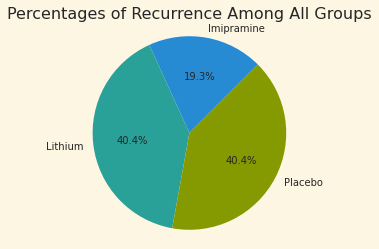

                Time  AcuteT   Age  Gender  Num No Recurrence
Treat                                                        
Imipramine  2102.712    5005  1154      35                 27
Lithium      940.429    2372   556      20                 14
Placebo      905.429    2114   366      17                 11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


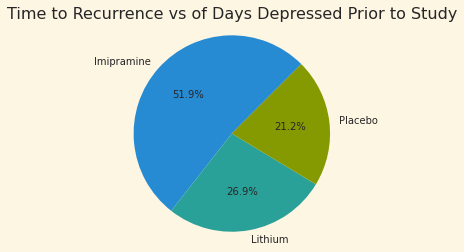

In [34]:
# if recurring episode happended, what was the average of each treatmetn 
# if recurrence didn't happened, what was that average 
recurDF = depDF[depDF.Recurrence==True]
# print(recurDF.head())
numRecur = recurDF.groupby('Treat').sum()
print(numRecur)
plt.style.use('Solarize_Light2')
plt.pie(numRecur.Recurrence, labels=numRecur.index, autopct = '%.1f%%', startangle=45)
plt.title('Percentages of Recurrence Among All Groups')
plt.axis('equal')
plt.show()

noRecurDF = depDF[depDF.Recurrence!=True]
noRecurDF['Num No Recurrence'] = noRecurDF['Recurrence'] == False
# print(noRecurDF.head())

noRecur = noRecurDF.groupby('Treat').sum()
del noRecur['Recurrence']
print(noRecur)
plt.style.use('Solarize_Light2')

plt.pie(noRecur['Num No Recurrence'], labels=noRecur.index, autopct = '%.1f%%', startangle=45)
plt.title('Time to Recurrence vs of Days Depressed Prior to Study')
plt.axis('equal')
plt.show()

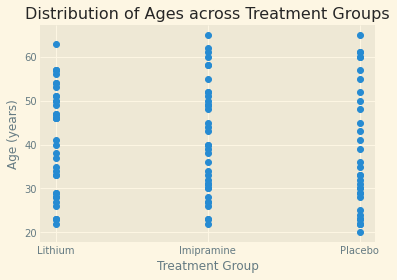

In [31]:
plt.style.use('Solarize_Light2')
plt.scatter(depDF.Treat, depDF.Age)
plt.xlabel('Treatment Group')
plt.ylabel('Age (years)')
plt.title('Distribution of Ages across Treatment Groups')
plt.show()
# age is not significant

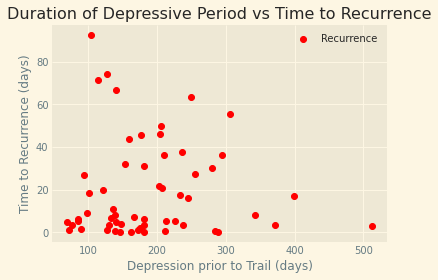

In [33]:
plt.scatter(recurDF.AcuteT,recurDF.Time, color='r', label='Recurrence')
plt.style.use('Solarize_Light2')

#plt.scatter( noRecurDF.AcuteT,noRecurDF.Time, color='b', label='No Recurrence')
plt.legend()
plt.xlabel('Depression prior to Trail (days)')
plt.ylabel('Time to Recurrence (days)')
plt.title('Duration of Depressive Period vs Time to Recurrence')
plt.show()

# this is messy 
# the longer the patients were depressed prior to the trial, the less effective the treatment was
# they relapsed earlier 

# however, the treatments proved more effective in cases where the patients 
# were depressed for shorter periods of time before the trial 

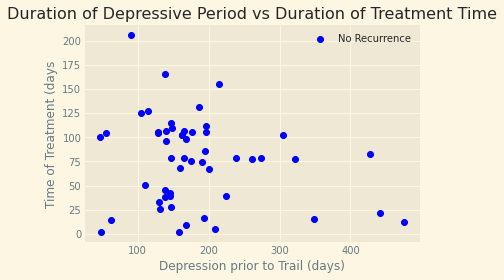

In [27]:
plt.style.use('Solarize_Light2')
plt.scatter( noRecurDF.AcuteT,noRecurDF.Time, color='b', label='No Recurrence')
plt.legend()
plt.xlabel('Depression prior to Trail (days)')
plt.ylabel('Time of Treatment (days')
plt.title('Duration of Depressive Period vs Duration of Treatment Time')
plt.show()

               Time  AcuteT  Age  Gender  Recurrence
Treat                                               
Imipramine  293.715    1974  418      16          11
Lithium     455.430    4015  973      29          23
Placebo     372.429    4758  921      30          23
                Time  AcuteT   Age  Gender  Num No Recurrence
Treat                                                        
Imipramine  2102.712    5005  1154      35                 27
Lithium      940.429    2372   556      20                 14
Placebo      905.429    2114   366      17                 11


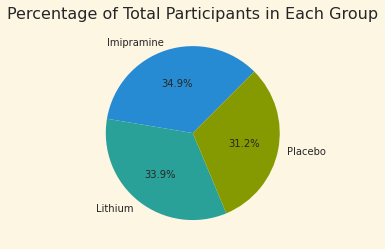

In [19]:
print(numRecur)
print(noRecur)
numParticipants = [depDF.groupby('Treat').count()]
csfont = {'fontname':'Times New Roman'}

Treatment = ['Imipramine', 'Lithium', 'Placebo']
numPartArr = [38,37,34]
plt.style.use('Solarize_Light2')
plt.pie(numPartArr, labels=Treatment, autopct = '%.1f%%', startangle=45)
plt.title('Percentage of Total Participants in Each Group',**csfont)
plt.show()
# shows that treatment and control groups were evenly divided 


               Time  AcuteT  Age  Gender  Recurrence
Treat                                               
Imipramine  293.715    1974  418      16          11
Lithium     455.430    4015  973      29          23
Placebo     372.429    4758  921      30          23
                Time  AcuteT   Age  Gender  Num No Recurrence
Treat                                                        
Imipramine  2102.712    5005  1154      35                 27
Lithium      940.429    2372   556      20                 14
Placebo      905.429    2114   366      17                 11


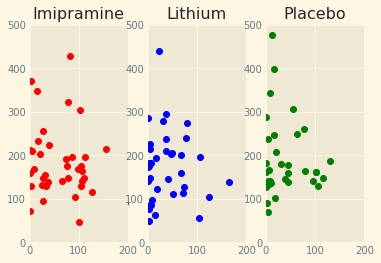

In [23]:
print(numRecur)
print(noRecur)
numParticipants = [depDF.groupby('Treat').count()]

Treatment = ['Imipramine', 'Lithium', 'Placebo']
numPartArr = [38,37,34]

imipramineDF = depDF[depDF.Treat=='Imipramine']
lithiumDF = depDF[depDF.Treat=='Lithium']
placeboDF = depDF[depDF.Treat=='Placebo']

plt.style.use('Solarize_Light2')
plt.subplot(1,3,1)
plt.scatter(imipramineDF.Time, imipramineDF.AcuteT, marker = 'o', color = 'r', label = 'Imipramine')
plt.axis([0, 200, 0, 500])
plt.title('Imipramine')
plt.subplot(1,3,2)
plt.scatter(lithiumDF.Time, lithiumDF.AcuteT, marker = 'o',color = 'b', label='Lithium')
plt.axis([0, 200, 0, 500])
plt.title("Lithium")
plt.subplot(1,3,3)
plt.scatter(placeboDF.Time, placeboDF.AcuteT, color = 'g',label = 'Placebo')
plt.axis([0, 200, 0, 500])
plt.title('Placebo')
plt.show()

# shows time to recurrence plotted against number of days depressed 

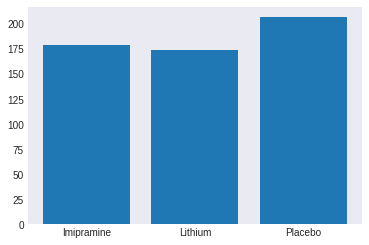

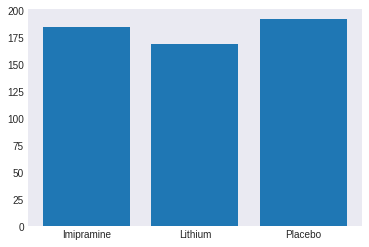

In [24]:
# average time to relapse with different treatments
plt.bar(numRecur.index, numRecur.AcuteT/numRecur.Recurrence)
# plt.bar("Lithium", lithiumDF.AcuteT/lithiumDF.Recurrence)
# plt.bar("Imipramine", placeboDF.AcuteT/placeboDF.Recurrence)
plt.show()

# average time to completion of treatmnet, no relapse 
plt.bar(noRecur.index, noRecur.AcuteT/noRecur["Num No Recurrence"])
plt.show()


                Time  AcuteT   Age  Gender  Recurrence
Treat                                                 
Imipramine  1770.571    4508  1114      25           6
Lithium      826.001    4047   997      25          17
Placebo      703.430    4555   846      21          16                Time  AcuteT  Age  Gender  Recurrence
Treat                                               
Imipramine  625.856    2471  458      26           5
Lithium     569.858    2340  532      24           6
Placebo     574.428    2317  441      26           7


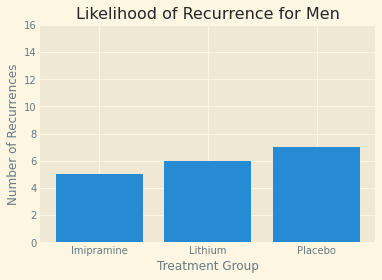

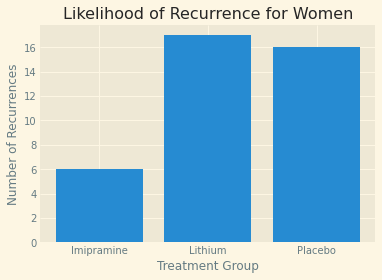

In [24]:
# are men or women more likely to relapse during treatment 

menDF = depDF[depDF.Gender == 2]
womenDF = depDF[depDF.Gender == 1]
# print(recurDF.head())
numRecurWomen = womenDF.groupby('Treat').sum()
numRecurMen = menDF.groupby('Treat').sum()
print(numRecurWomen, numRecurMen)

plt.style.use('Solarize_Light2')
plt.bar(numRecurMen.index, numRecurMen.Recurrence)
plt.ylim(ymax=16)
plt.xlabel("Treatment Group")
plt.ylabel("Number of Recurrences")
plt.title("Likelihood of Recurrence for Men")
plt.show()

plt.style.use('Solarize_Light2')
plt.bar(numRecurWomen.index, numRecurWomen.Recurrence)
plt.xlabel("Treatment Group")
plt.ylabel("Number of Recurrences")
plt.title("Likelihood of Recurrence for Women")
plt.show()


               Time  AcuteT  Age  Gender  Recurrence
Treat                                               
Imipramine  293.715    1974  418      16          11
Lithium     455.430    4015  973      29          23
Placebo     372.429    4758  921      30          23
                Time  AcuteT   Age  Gender  Num No Recurrence
Treat                                                        
Imipramine  2102.712    5005  1154      35                 27
Lithium      940.429    2372   556      20                 14
Placebo      905.429    2114   366      17                 11


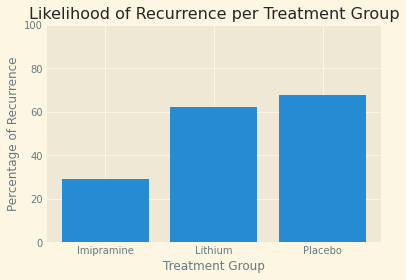

In [25]:
# likelihood of recurrence if depressive period was more than 100 days?
# 200? 
print(numRecur)
print(noRecur)
numPartArr = [38,37,34]
treatments = ['Imipramine','Lithium','Placebo']
averageOfRecurrence = [11/38*100,23/37*100,23/34*100]
plt.style.use('Solarize_Light2')
plt.bar(treatments,averageOfRecurrence)
plt.ylim(ymax=100)
plt.ylabel("Percentage of Recurrence")
plt.xlabel("Treatment Group")
plt.title("Likelihood of Recurrence per Treatment Group")
plt.show()

## **Final Deliverable**

Your final submission should consist of captioned visualizations detailing your most important insights. You will also work on writing and posting a blog to medium or your github website. Your “insights” can include important surprises or issues (such as data quality problems affecting your analysis) as well as responses to your analysis questions.

Each visualization image should be a screenshot accompanied with a title and descriptive caption (1-4 sentences long) describing the insight(s) learned from that view. Provide sufficient detail for each caption such that anyone could read through your report and understand what you’ve learned. You are free, but not required, to annotate your images to draw attention to specific features of the data. 

Do not submit a blog cluttered with everything little thing you tried. Submit a clean report that highlights the most important “milestones” in your exploration, which can include initial overviews, identification of data quality problems, confirmations of key assumptions, and potential “discoveries”. Your blog should only present the final dataset you analyzed and should not describe any iterations on earlier datasets you might have initially explored.

## **Data Sources**

There are a variety of data sources available online. Here are some possible sources to consider. If you have any questions about whether your dataset is appropriate, please talk to the TAs.

**Data is Plural** - Variety of datasets and sources covering many topics.

https://data.gov - U.S. Government open datasets.

U.S. Census Bureau - Census data - https://data.census.gov/

Federal Elections Commission - Campaign finance and expenditures. - https://www.fec.gov/data/

Federal Aviation Administration - FAA data - https://www.faa.gov/data_research/

https://www.kaggle.com/

https://archive.ics.uci.edu/ml/index.php

https://github.com/awesomedata/awesome-public-datasets - Awesome Public Datasets - Variety of public datasets.

Stanford Cable TV News Analyzer - We have recently released a tool that can be used to analyze who and what appears in the last decade of Cable TV News (i.e. CNN, Fox News, MSNBC). The site lets you download data as well which you could use to conduct further analysis. - https://tvnews.stanford.edu/data

### **Visualization Tool (matplotlib, seaborn, etc)**

One goal of this assignment is for you to learn to use and evaluate the effectiveness of these packages. In addition to these packages, you are free to also use other visualization tools as you see fit, for example, you could also take a look at Tableau.

### **Data Wrangling Tools**

The data you choose may require reformatting, transformation or cleaning prior to visualization. You can use Pandas for data preparation. 

### **Grading**

Each submission will be graded based on both the analysis process and the included visualizations. Here are our grading criteria:

**Appropriate Data Assessment (5):** Overview/understanding of the data is built from transformations and appropriate assessment of data quality. Poses clear questions.

**Exploration Thoroughness (5):** Sufficient breadth of analysis, exploring questions in sufficient depth (with appropriate follow-up questions).

**Documentation (Blog) (5):** Clear documentation of exploratory process, including clearly written, understandable captions that communicate primary insights.

**Appropriate use of Numpy, Pandas, and Matplotlib (5)**  to ingest, clean, and present the data

### **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Sunday (03/07/2021)

To submit your assignment, download your notebook and zip all the necessary files(data files). Submit the zipped file to balckboard. Make sure the notebook and the zipped file is named in the format - EDA_LastName_FirstName. Be sure to include the link to access your blog in your notebook.

Also include the link to your notebook in the submission. 

We will provide more details on the blog during the next week of class.

**Note** - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.